<h2> Data </h2>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [9]:
df=pd.read_csv("weather_classification_data.csv")
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


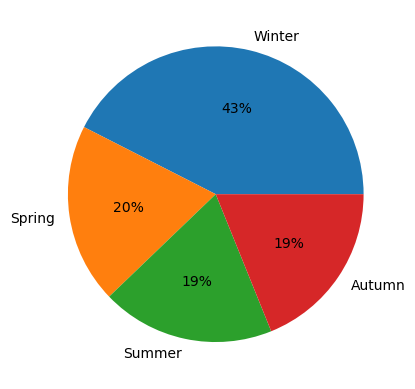

In [58]:
""" model=SVC()
X=df.drop('weather_type',axis=1)
y=df['weather_type']
X[:5]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model.fit(X_train,y_train)
yp=model.predict(X_test)
rep=classification_report(y_test,yp)
print(rep) """
val=(df['season'].value_counts().values)
nam=df['season'].unique()
from matplotlib import pyplot as plt
plt.pie(val,labels=nam,autopct='%.0f%%')
plt.show()

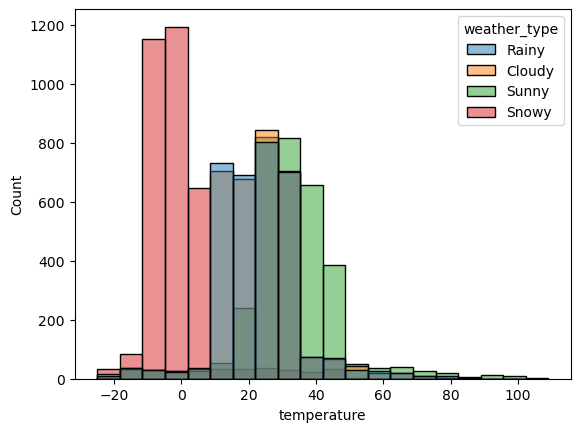

In [22]:
import seaborn as sns
sns.histplot(df,x='temperature',bins=20,hue='weather_type')
plt.show()

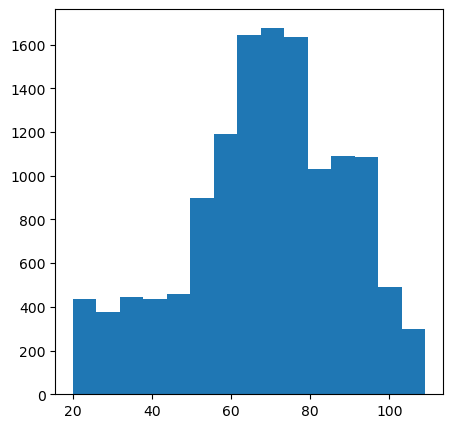

In [66]:
plt.figure(figsize=(5,5))
plt.hist(df['humidity'],bins=15)
plt.show()

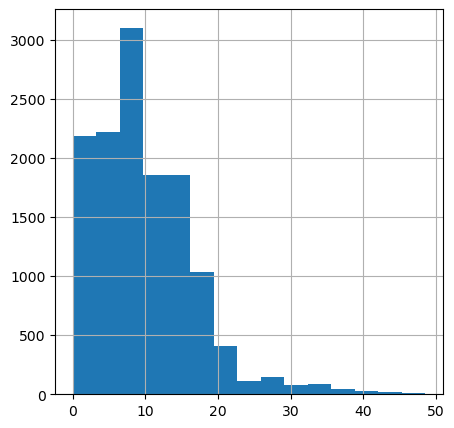

In [68]:
df['wind_speed'].hist(bins=15,figsize=(5,5))
plt.show()

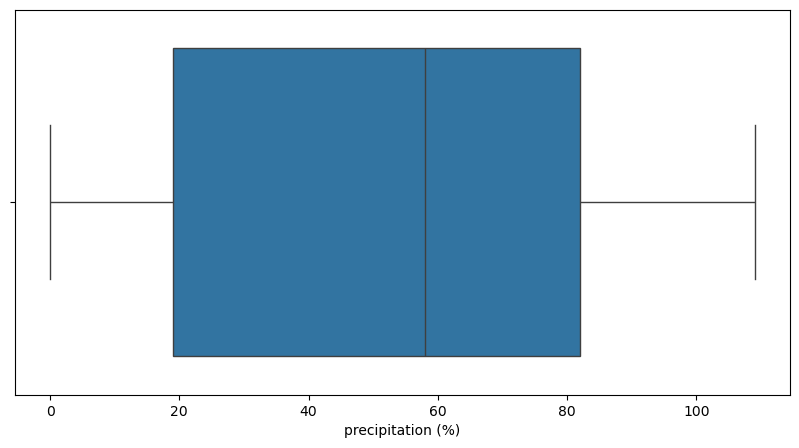

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(df,x='precipitation (%)')
plt.show()

In [47]:
df1=pd.get_dummies(df,columns=['cloud_cover','location','season'],drop_first=True)

In [74]:
X=df1.drop('weather_type',axis=1)
y=df1['weather_type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X)
X_scaled=scale.transform(X)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)
model=SVC(kernel='linear')
model.fit(X_train_scaled,y_train)
yp=model.predict(X_test_scaled)
print("Classification Report: ")
rep=classification_report(y_test,yp)
print(rep) 
print('Accuracy: ',end=' ')
print(model.score(X_test_scaled,y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

      Cloudy       0.86      0.86      0.86       820
       Rainy       0.88      0.87      0.88       834
       Snowy       0.91      0.93      0.92       828
       Sunny       0.90      0.89      0.90       818

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300

Accuracy:  0.8896969696969697
[[708  68  17  27]
 [ 43 729  40  22]
 [ 20  11 768  29]
 [ 49  19  19 731]]


In [75]:
model=SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)
yp=model.predict(X_test_scaled)
print("Classification Report: ")
rep=classification_report(y_test,yp)
print(rep) 
print('Accuracy: ',end=' ')
print(model.score(X_test_scaled,y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

      Cloudy       0.86      0.91      0.88       820
       Rainy       0.91      0.91      0.91       834
       Snowy       0.95      0.93      0.94       828
       Sunny       0.93      0.91      0.92       818

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

Accuracy:  0.9130303030303031
[[745  43  10  22]
 [ 50 758  14  12]
 [ 29  14 766  19]
 [ 45  16  13 744]]


In [77]:
model=SVC(kernel='rbf',gamma='auto',degree=2,C=0.5)
model.fit(X_train_scaled,y_train)
yp=model.predict(X_test_scaled)
print("Classification Report: ")
rep=classification_report(y_test,yp)
print(rep) 
print('Accuracy: ',end=' ')
print(model.score(X_test_scaled,y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       820
       Rainy       0.90      0.91      0.91       834
       Snowy       0.97      0.92      0.94       828
       Sunny       0.92      0.91      0.92       818

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

Accuracy:  0.9112121212121213
[[743  48   5  24]
 [ 50 759   9  16]
 [ 33  15 759  21]
 [ 47  18   7 746]]


In [79]:
from sklearn.pipeline import Pipeline
pip=Pipeline([('scale',StandardScaler()),('s',SVC(kernel='rbf'))])
pip.fit(X_train_scaled,y_train)
pip.predict(X_test_scaled)
print("Classification Report: ")
rep=classification_report(y_test,yp)
print(rep) 
print('Accuracy: ',end=' ')
print(pip.score(X_test_scaled,y_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       820
       Rainy       0.90      0.91      0.91       834
       Snowy       0.97      0.92      0.94       828
       Sunny       0.92      0.91      0.92       818

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

Accuracy:  0.9130303030303031
[[743  48   5  24]
 [ 50 759   9  16]
 [ 33  15 759  21]
 [ 47  18   7 746]]
